In [1]:
%pip install gymnasium torch 'gymnasium[box2d]' seaborn pandas stable_baselines3 moviepy
#  py-heat-magic py-heat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [422]:
# %%heat

import sys
import importlib

for mod in ['memory', 'nets', 'utils', 'agent', 'agent_rnd', 'train']:
    if mod in sys.modules:
        importlib.reload(sys.modules[mod]) 

# from agent_rnd import Agent as AgentRND
from agent import Agent
from train import train_agent_across_seeds, train_agent
from utils import MaxAndSkipObservation
import gymnasium as gym
from itertools import product


env = gym.make('LunarLander-v2', 
               enable_wind = True,
               wind_power = 15.0,
               turbulence_power = 1.5,
              )
# env = MaxAndSkipObservation(env, skip = 5)
# wrapped_env = MaxAndSkipObservation(env)



# rewards_over_seeds_64 = train_agent_across_seeds(solved_score=250.0, num_neurons=64)

# rewards_over_seeds_256 = train_agent_across_seeds(solved_score=250.0, num_neurons=256)



# Define the options for each parameter
agent_config_options = {
    "apply_double_dqn": [False, True],
    "apply_dueling_dqn": [False, True],
    "apply_hard_update": [False, True]
}

# Generate all combinations
agent_config_combinations = product(*agent_config_options.values())

# Iterate through each combination
if False:
    for combination in agent_config_combinations:
        agent_config = {
            "num_neurons": 128,
            # "apply_double_dqn": False,
            # "apply_dueling_dqn": False,
            # "apply_rnd": False,
            # "apply_hard_update": True,
            "buffer_size": 200000,
            "batch_size": 64,
            "update_target_every": 1000,
            "lr": 0.001,
            "gamma": 0.99,
            "tau": 0.001
        }
        
        combination_agent_config = {key: value for key, value in zip(agent_config_options.keys(), combination)}

        agent_config.update(combination_agent_config)
    
        rewards_over_seeds_128 = train_agent_across_seeds(
            env,
            config = {
                # "agent": { 
                #     "num_neurons": 128,
                #     "apply_double_dqn": False,
                #     "apply_dueling_dqn": True,
                #     # "apply_rnd": False,
                #     "apply_hard_update": False,
                # },
                "files_prefix": "",
                "agent": agent_config
            },
            n_episodes=2000, 
            max_t=2000, 
            seeds=[5], 
            solved_score=200.0, 
            eps_start=1.0, 
            eps_end=0.01, 
            eps_decay=0.995
        )
        # Print the current combination of options

if True:
    rewards_over_seeds_128 = train_agent_across_seeds(
        env,
        config = {
            "files_prefix": "hard_mode_",
            "agent": { 
                "num_neurons": 128,
                "apply_double_dqn": False,
                "apply_dueling_dqn": True,
                # "apply_rnd": False,
                "apply_hard_update": False,
                "buffer_size": 200000,
                "batch_size": 64,
                "update_target_every": 1000,
                "lr": 0.001,
                "gamma": 0.99,
                "tau": 0.001
            },
        },
        n_episodes=2000, 
        max_t=2000, 
        seeds=[5], 
        solved_score=120.0, 
        eps_start=1.0, 
        eps_end=0.01, 
        eps_decay=0.995
    )

# State shape:  (8,)
# Number of actions:  4
# Number of neurons:  128
# Episode 100	Average Reward: -132.01 Epsilon: 0.61
# Episode 200	Average Reward: -64.82 Epsilon: 0.373
# Episode 300	Average Reward: -3.19 Epsilon: 0.223
# Episode 400	Average Reward: 14.73 Epsilon: 0.13
# Episode 500	Average Reward: 42.11 Epsilon: 0.089
# Episode 600	Average Reward: 189.93 Epsilon: 0.05
# Episode 700	Average Reward: 219.56 Epsilon: 0.03
# Episode 800	Average Reward: 229.74 Epsilon: 0.02
# Episode 900	Average Reward: 132.76 Epsilon: 0.01
# Episode 1000	Average Reward: 233.27 Epsilon: 0.01
# Episode 1100	Average Reward: 247.88 Epsilon: 0.01
# Episode 1200	Average Reward: 240.99 Epsilon: 0.01
# Episode 1300	Average Reward: 259.15 Epsilon: 0.01
# Episode 1400	Average Reward: 174.29 Epsilon: 0.01
# Episode 1500	Average Reward: -22.70 Epsilon: 0.01


Agent initialized with:
state_size: 8
action_size: 4
num_neurons: 128
update_target_every: 1000
apply_double_dqn: False
apply_dueling_dqn: True
apply_rnd: False
apply_hard_update: False
gamma: 0.99
lr: 0.001
tau: 0.001
batch_size: 64
buffer_size: 200000
config: {'files_prefix': 'hard_mode_', 'agent': {'num_neurons': 128, 'apply_double_dqn': False, 'apply_dueling_dqn': True, 'apply_hard_update': False, 'buffer_size': 200000, 'batch_size': 64, 'update_target_every': 1000, 'lr': 0.001, 'gamma': 0.99, 'tau': 0.001}}

State shape:  (8,)
Number of actions:  4
Number of neurons:  128
Episode 100	Average Reward: -228.11 Epsilon: 0.61
Episode 200	Average Reward: -115.62 Epsilon: 0.37
Episode 300	Average Reward: -63.43 Epsilon: 0.224
Episode 400	Average Reward: -55.09 Epsilon: 0.13
Episode 500	Average Reward: -82.86 Epsilon: 0.08
Episode 600	Average Reward: -8.00 Epsilon: 0.055
Episode 700	Average Reward: 65.96 Epsilon: 0.035
Episode 800	Average Reward: -72.80 Epsilon: 0.02
Episode 900	Average 

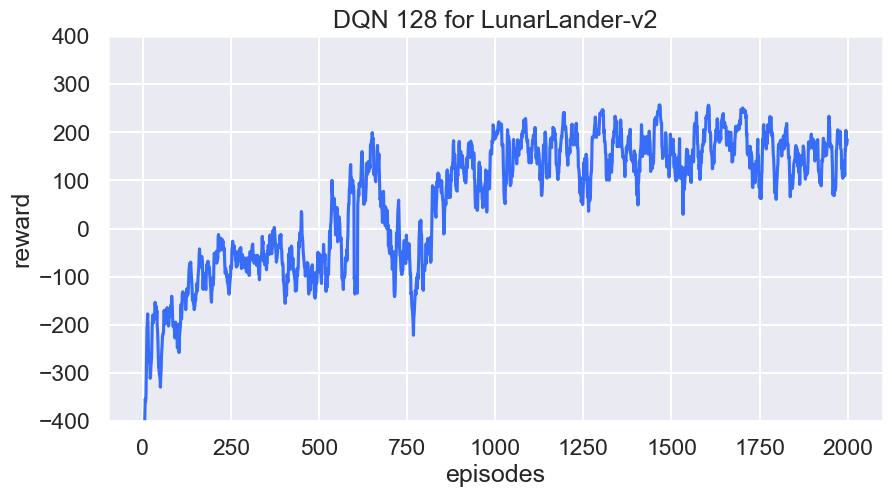

In [423]:
# for mod in ['memory', 'nets', 'utils', 'agent', 'agent_rnd', 'train']:
#     if mod in sys.modules:
#         importlib.reload(sys.modules[mod]) 

import pandas as pd
import seaborn as sns
from utils import moving_average, save_python_obj, load_python_obj


# rws = [[[reward[0] + 20] for reward in rewards] for rewards in rewards_over_seeds_128]

# save_python_obj(rewards_over_seeds_128, input())
rewards_over_seeds = moving_average(rewards_over_seeds_128, 10)

plt.rcParams["figure.figsize"] = (10, 5)
rewards_to_plot = [[reward[0] for reward in rewards] for rewards in rewards_over_seeds]
df1 = pd.DataFrame(rewards_to_plot).melt()
df1.rename(columns={"variable": "episodes", "value": "reward"}, inplace=True)
sns.set(style="darkgrid", context="talk", palette="rainbow")
sns.lineplot(x="episodes", y="reward", data=df1).set(
    title="DQN 128 for LunarLander-v2"
)
# plt.xlim(0, 600)
plt.ylim(-400, 400)
plt.show()

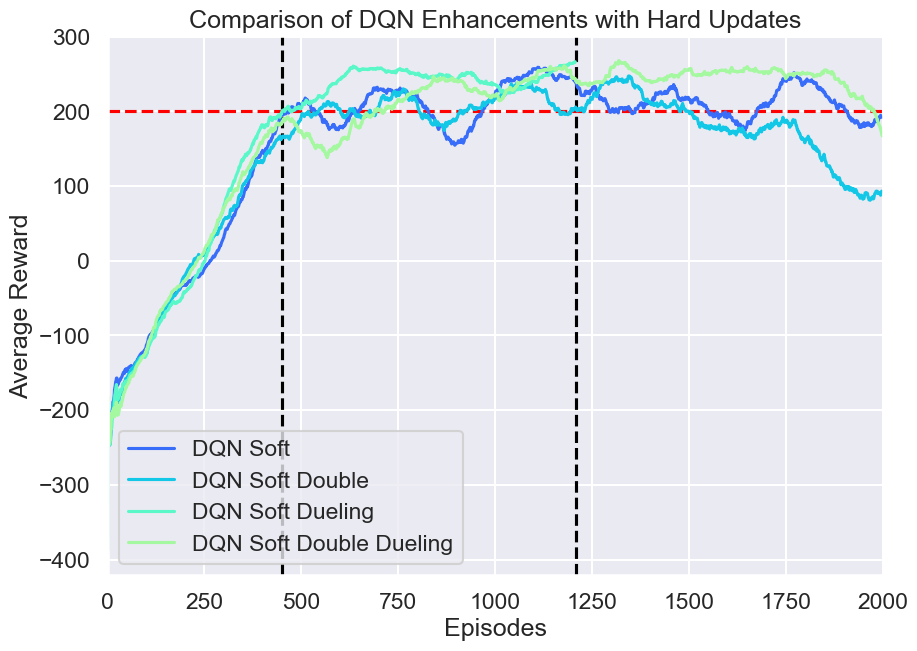

266.57196 1208 451


In [543]:
import matplotlib.pyplot as plt
from utils import moving_average

def prep(rewards_over_seeds):
    rewards_over_seeds = moving_average(rewards_over_seeds, 100)
    return [[reward[0] for reward in rewards] for rewards in rewards_over_seeds][0]

# print(load_python_obj("./dqn_128_soft.pkl"))
# Arrays representing average rewards against episodes for different modifications to DQN
dqn_soft_rewards = prep(load_python_obj("./dqn_128_soft.pkl"))
dqn_soft_double_rewards = prep(load_python_obj("./dqn_128_soft_double.pkl"))
dqn_soft_dueling_rewards = prep(load_python_obj("./dqn_128_soft_dueling.pkl"))
dqn_soft_double_dueling_rewards = prep(load_python_obj("./dqn_128_soft_double_dueling.pkl"))
dqn_hard_rewards = prep(load_python_obj("./dqn_128_hard.pkl"))
dqn_hard_double_rewards = prep(load_python_obj("./dqn_128_hard_double.pkl"))
dqn_hard_dueling_rewards = prep(load_python_obj("./dqn_128_hard_dueling.pkl"))
dqn_hard_double_dueling_rewards = prep(load_python_obj("./dqn_128_hard_double_dueling.pkl"))


# double_dqn_rewards = [0.4, 0.55, 0.65, 0.75, 0.85]
# dueling_dqn_rewards = [0.45, 0.57, 0.68, 0.79, 0.88]

plt.axhline(y=200, color='r', linestyle='--')
terminates_at = len(dqn_soft_dueling_rewards)
breaks_at = next((i for i, val in enumerate(dqn_soft_dueling_rewards) if val > 200), None)
plt.axvline(x=terminates_at, color='black', linestyle='--')
plt.axvline(x=breaks_at, color='black', linestyle='--')

# Plot the rewards
plt.plot(dqn_soft_rewards, label='DQN Soft')
plt.plot(dqn_soft_double_rewards, label='DQN Soft Double')
plt.plot(dqn_soft_dueling_rewards, label='DQN Soft Dueling')
plt.plot(dqn_soft_double_dueling_rewards, label='DQN Soft Double Dueling')
# plt.plot(dqn_hard_rewards, label='DQN Hard')
# plt.plot(dqn_hard_double_rewards, label='DQN Hard Double')
# plt.plot(dqn_hard_dueling_rewards, label='DQN Hard Dueling')
# plt.plot(dqn_hard_double_dueling_rewards, label='DQN Hard Double Dueling')
# .plot(x1, y1)
# axs[0].set_title('Plot 1')  # Set title for the first subplot
# Add labels and title



plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Comparison of DQN Enhancements with Hard Updates')

# Add legend
plt.legend()
plt.xlim(0, 2000)
plt.savefig('soft-runs-plot.pdf')
# Show plot
plt.show()


print(dqn_soft_dueling_rewards[-1], len(dqn_soft_dueling_rewards), next((i for i, val in enumerate(dqn_soft_dueling_rewards) if val > 200), None))

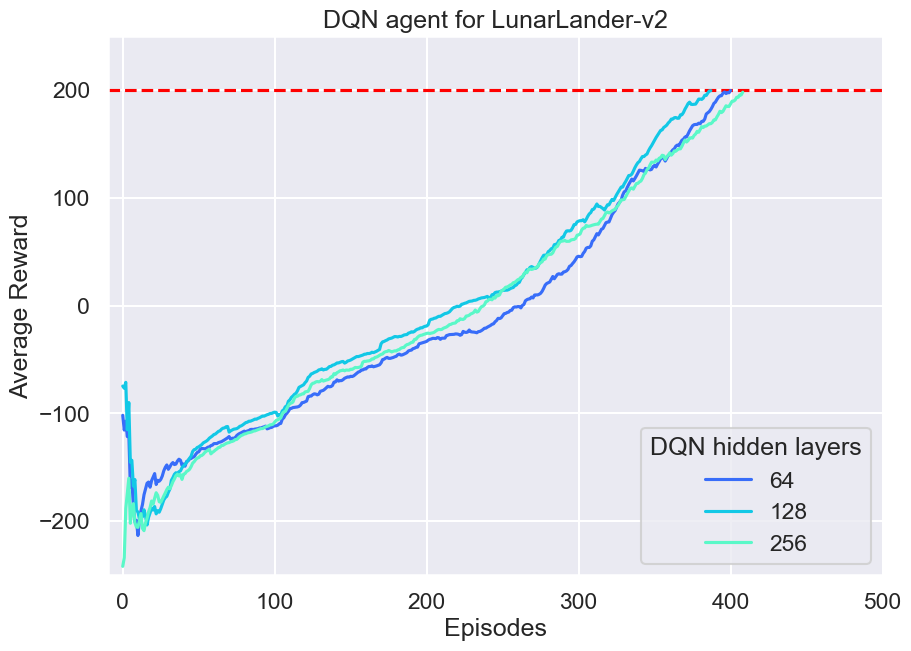

In [445]:
import sys
import importlib

importlib.reload(sys.modules['utils'])
importlib.reload(sys.modules['plots'])

from utils import moving_average
from plots import plot_reward_by_episode, prepare_data

data = [ 
    prepare_data(
        moving_average(
            load_python_obj(f'./rewards/rewards_over_seeds_{num_neurons}_1.pkl')[3:4],
            100
        ),
        label_key="DQN hidden layers",
        label_value=f'{num_neurons}'
    ) for num_neurons in [64, 128, 256]
]

plot_reward_by_episode(
    data=data, 
    label_key="DQN hidden layers",
    title="DQN agent for LunarLander-v2"
)




In [493]:
from IPython.display import HTML
from IPython.display import display
import glob
import base64
import io

def show_video(path):
    # mp4list = glob.glob('recordings/*.mp4')
    # if len(mp4list) > 0:
    mp4 = path
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    display(HTML(data='''<video alt="test" autoplay 
            loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{0}" type="video/mp4" />
         </video>'''.format(encoded.decode('ascii'))))
    # else:
        # print("Could not find video")

def evaluate(num_neurons=128, record_video=False, seed=1):
    agent = Agent(state_size=obs_space_dims, action_size=action_space_dims, num_neurons=num_neurons)
    state_dict = torch.load(f'./checkpoints/checkpoint_{agent.num_neurons}.pth')
    agent.net.load_state_dict(state_dict)

    return evaluate_agent(agent, record_video=record_video, seed=seed)
    
def evaluate_agent(agent, random_actions=False, record_video=False, seed=1, env_config={}):
    total_reward = 0
    q_values_record = []
    chosen_actions = []

    # env = gym.make("LunarLander-v2", render_mode="rgb_array")

    env_args = {
        "id": 'LunarLander-v2', 
         "render_mode": "rgb_array",
    }
    env_args.update(env_config)
    env = gym.make(
              
              **env_args
               # enable_wind = True,
               # wind_power = 15.0,
               # turbulence_power = 1.5,
              )
    env = gym.wrappers.RecordEpisodeStatistics(env, 100)  # Records episode-reward
    state, _ = env.reset(seed=seed)

    obs_space_dims = env.observation_space.shape[0]
    action_space_dims = env.action_space.n

    if record_video:
        env = gym.wrappers.RecordVideo(
                env=env,
                video_folder="./recordings",
                name_prefix=f"eval_{agent.num_neurons}",
                # video_length=1000,
                disable_logger=True
            )
        env.start_video_recorder()

    for _ in range(3000):
        if random_actions:
            action = env.action_space.sample()
        else:
            action, q_values = agent.act(state, 0)
            q_values_record.append(q_values)
        chosen_actions.append(action)

        state, reward, done, truncated, info = env.step(action)
        env.render()
    
        if done or truncated:
            total_reward = info['episode']['r'][0]
            # print(f"Total Reward = {total_reward}")
            break

    if record_video:
        env.close_video_recorder()

        show_video(f"./recordings/eval_{agent.num_neurons}-episode-0.mp4")
    return (q_values_record, chosen_actions, total_reward)


def multiple_evaluations(runs=1000, num_neurons=128):
    rewards = []
    for i in range(runs):
        seed = i  # Using a different seed for each run might be useful
        (_, _, reward) = evaluate(num_neurons=num_neurons, seed=seed)
        rewards.append(reward)
        print(f"Run {i+1}: Total Reward = {reward}")

    return rewards

def multiple_evaluations_with_agent(agent, runs=1000):
    rewards = []
    for i in range(runs):
        seed = i  # Using a different seed for each run might be useful
        (_, _, reward) = evaluate_agent(agent, seed=seed)
        rewards.append(reward)
        print(f"Run {i+1}: Total Reward = {reward}")

    return rewards

# Plotting function
def plot_rewards(rewards):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards, label='Rewards')
    plt.title('Rewards Across Multiple Runs')
    plt.xlabel('Run')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid(True)
    plt.show()

####
# Don't forget to close the video recorder before the env!




In [475]:
from agent import Agent
import torch
obs_space_dims = env.observation_space.shape[0]
action_space_dims = env.action_space.n

agent_args = {
    "state_size": obs_space_dims, 
    "action_size": action_space_dims, 
    "num_neurons": 128,
    "apply_double_dqn": True,
    "apply_dueling_dqn": True,
    # "apply_rnd": False,
    "apply_hard_update": False,
    "buffer_size": 200000,
    "batch_size": 64,
    "update_target_every": 1000,
    "lr": 0.001,
    "gamma": 0.99,
    "tau": 0.001
}
agent = Agent(
    **agent_args
)
# state_dict = torch.load('./checkpoints/checkpoint_128.pth')

# Best performing for easy mode
# state_dict = torch.load('./checkpoints/dqn_128_soft_dueling.pth')
# Attempt as hard mode
state_dict = torch.load('./checkpoints/hard_mode_dqn_128_soft_dueling.pth')


agent.net.load_state_dict(state_dict)
agent.target_net.load_state_dict(state_dict)



Agent initialized with:
state_size: 8
action_size: 4
num_neurons: 128
update_target_every: 1000
apply_double_dqn: True
apply_dueling_dqn: True
apply_rnd: False
apply_hard_update: False
gamma: 0.99
lr: 0.001
tau: 0.001
batch_size: 64
buffer_size: 200000
config: {}



<All keys matched successfully>

In [ ]:
# env = gym.make("LunarLander-v2", render="rg")
env = gym.make("LunarLander-v2", 
               render_mode="rgb_array",
               enable_wind = True,
               wind_power = 15.0,
               turbulence_power = 1.5,
)
# reward_over_episodes = train_agent(seed=1, agent=agent, env=env, n_episodes=500, max_t=1000, eps_start=0.5, eps_end=0.01, eps_decay=0.995, solved_score=300.0)
reward_over_episodes = train_agent(
    seed=1, 
    agent=agent, 
    env=env, 
    n_episodes=2000, 
    max_t=2000, 
    eps_start=1.0, 
    eps_end=0.01, 
    eps_decay=0.995,
    solved_score=120.0
)

In [513]:
# q_values_record, chosen_actions, total_reward = evaluate(num_neurons=64, record_video=True, seed = 1)
# q_values_record, chosen_actions, total_reward = evaluate(num_neurons=128, record_video=True, seed = 1)
# q_values_record, chosen_actions, total_reward = evaluate(num_neurons=256, record_video=True, seed = 1)

# rewards = multiple_evaluations_with_agent(agent, runs=50)
# plot_rewards(rewards)

# (q_values_record, _, total_reward) = evaluate_agent(agent, record_video=False, seed=10)
# print(f"Total reward = {total_reward}")
# rewards = multiple_evaluations_with_agent(agent, runs=1000)

rewards = []
for i in range(1000):
    seed = i  # Using a different seed for each run might be useful
    (_, _, reward) = evaluate_agent(
        agent, 
        random_actions=False,
        seed = seed,
        env_config={
            "enable_wind": True,
            "wind_power": 15.0,
            "turbulence_power": 1.5,
        },
    )
    rewards.append(reward)
    print(f"Run {i+1}: Total Reward = {reward}")

# agent_hard_rewards = rewards


Run 1: Total Reward = 264.9934387207031
Run 2: Total Reward = -65.31019592285156
Run 3: Total Reward = 202.27426147460938
Run 4: Total Reward = 214.82907104492188
Run 5: Total Reward = 251.78903198242188
Run 6: Total Reward = 64.15841674804688
Run 7: Total Reward = 298.6559143066406
Run 8: Total Reward = 19.59417724609375
Run 9: Total Reward = 250.8673858642578
Run 10: Total Reward = 195.16293334960938
Run 11: Total Reward = 238.40933227539062
Run 12: Total Reward = 165.5855712890625
Run 13: Total Reward = 242.11746215820312
Run 14: Total Reward = 66.43049621582031
Run 15: Total Reward = 12.325088500976562
Run 16: Total Reward = 264.12396240234375
Run 17: Total Reward = 220.19256591796875
Run 18: Total Reward = 24.99292755126953
Run 19: Total Reward = 300.515869140625
Run 20: Total Reward = 224.42758178710938
Run 21: Total Reward = 284.98583984375
Run 22: Total Reward = -148.93240356445312
Run 23: Total Reward = 259.3810119628906
Run 24: Total Reward = 241.79139709472656
Run 25: Total 

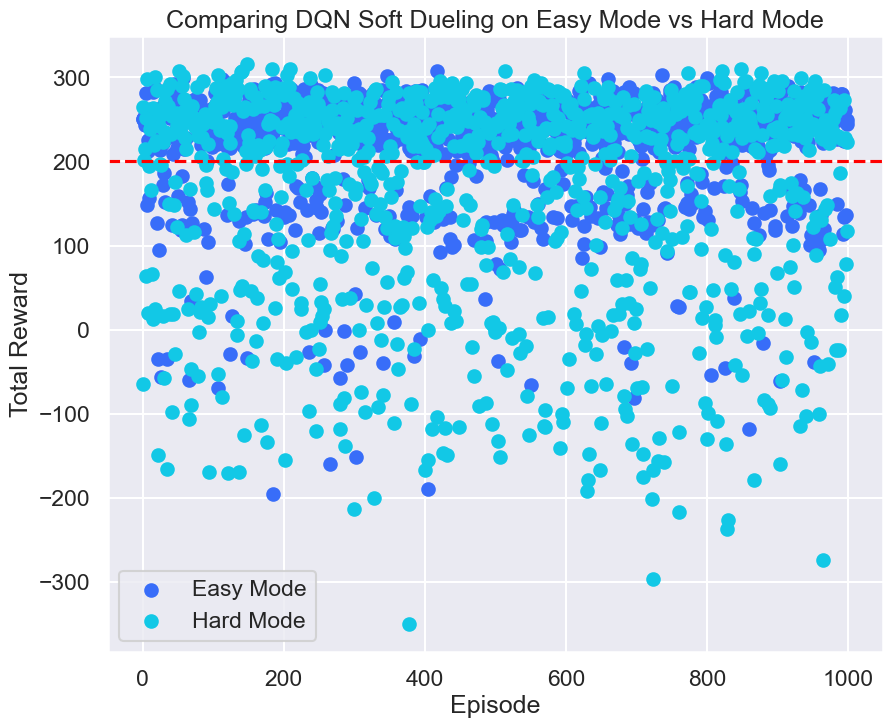

In [531]:
# agent_rewards = rewards
# random_rewards = rewards
# agent_hard_rewards = rewards
plt.figure(figsize=(10, 8))
# plt.plot(random_rewards, label='Random Action Policy')
plt.scatter(range(1000), agent_rewards[1:], label='Easy Mode')
plt.scatter(range(1000), agent_hard_rewards, label='Hard Mode')
# agent_hard_rewards
plt.title('Comparing DQN Soft Dueling on Easy Mode vs Hard Mode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.axhline(y=200, color='r', linestyle='--')
plt.grid(True)
plt.savefig('benchmark-hard-plot.pdf')
plt.show()

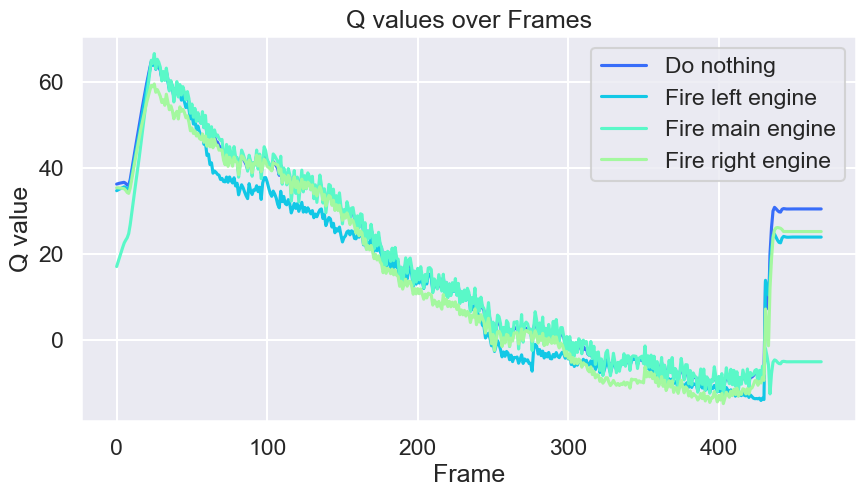

In [325]:
import numpy as np

q_values_array = np.array(q_values_record)  # Convert to a numpy array for easier handling
q_values_array = q_values_array.squeeze(axis=1)  # This changes the shape to (num_frames, num_actions)

# # Normalise
# q_values_array = (q_values_array - np.mean(q_values_array, axis=1, keepdims=True)) / \
#                         np.std(q_values_array, axis=1, keepdims=True)

actions = ['Do nothing', 'Fire left engine', 'Fire main engine', 'Fire right engine']

plt.figure(figsize=(10, 5))
# Plot each action's Q values
for action_idx in range(q_values_array.shape[1]):
    # print(actions[action_idx])
    plt.plot(q_values_array[:, action_idx], label=f'{actions[action_idx]}')
plt.title('Q values over Frames')
plt.xlabel('Frame')
plt.ylabel('Q value')
plt.legend(loc='upper right')
plt.show()


# plt.figure(figsize=(10, 5))
# plt.plot(chosen_actions, marker='o', linestyle='-', markersize=5)
# plt.title('Actions Taken Over Time')
# plt.xlabel('Timestep')
# plt.ylabel('Action')
# plt.yticks(np.arange(env.action_space.n), [f'{actions[i]}' for i in range(env.action_space.n)])
# plt.grid(True)
# plt.show()

# specific_action = 2  # The action you're interested in
# timesteps = [i for i, a in enumerate(chosen_actions) if a == specific_action]
# # Create a list of the specific action repeated to match the number of timesteps
# actions_taken = [specific_action] * len(timesteps)

# plt.figure(figsize=(10, 5))
# plt.scatter(timesteps, actions_taken, color='red', label=f'Action {specific_action} taken')
# plt.title('Occurrences of Action Over Time')
# plt.xlabel('Timestep')
# plt.ylabel('Action')
# plt.yticks([specific_action], [f'Action {specific_action}'])
# plt.legend()
# plt.grid(True)
# plt.show()

# print(reward_over_episodes)

In [508]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip
from PIL import Image, ImageDraw, ImageFont
import os



# recorded_frames = []
# for i in range(150):
#     env.reset(seed = i)
#     recorded_frames.append(env.render())

# frames_per_sec = env.metadata.get("render_fps", 30)
# clip = ImageSequenceClip(recorded_frames, fps=15)

# path = os.path.join("./recordings", f"starting-poings.mp4")
# clip.write_videofile(path, logger=None)

# show_video(path)

from matplotlib import font_manager


font_file = font_manager.findfont('Helvetica Neue')
    


def write_reward_in_frame(recording_name, frame, reward, rewards):
    # Convert array to image
    img = Image.fromarray(frame)
    draw = ImageDraw.Draw(img)

    # Define font (this path might need to be adjusted for your environment)
    #Find the path for a specific font:
    
    #Load the font to pillow
    font = ImageFont.truetype(font_file, 20)
    # font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf", 16)

    # Insert text; you can adjust the position and color as needed
    text = f"{recording_name}\nTotal Reward: {reward:.0f}\n"

    if len(rewards) > 0:
        text = f"{text}\nEpisodes: \n"
        for episode, reward in enumerate(rewards):
            text = f"{text}{episode+1} -> {reward:.0f}\n"
    
    # Calculate text width and position for top right corner
    draw.text((10, 10), text, 
              font=font, 
              fill=(255, 37, 0))

    return np.array(img)

def record_env(env, recording_name, step_function, num_episodes=1, max_steps_per_episode=100):
    recorded_frames = []

    total_rewards = []
    for episode in range(num_episodes):
        state, _ = env.reset(seed=episode)
        total_reward = 0
        rendered_total_reward = 0
        render_new_total_reward_frequency = 5
        for i in range(max_steps_per_episode):
            if i % render_new_total_reward_frequency == 0:
                rendered_total_reward = total_reward

            frame = env.render()
            frame = write_reward_in_frame(recording_name, frame, rendered_total_reward, total_rewards)
            recorded_frames.append(frame)

            # action = step_function(env, state)
            state, reward, done, _, info = step_function(env, state)
            total_reward += reward
            
            if done:
                break

        total_rewards.append(total_reward)
        frame = env.render()
        frame = write_reward_in_frame(recording_name, frame, total_reward, total_rewards)
        recorded_frames.append(frame)

    env.close()
    
    # Save the recorded frames as a video
    frames_per_sec = env.metadata.get('render_fps', 30) // 1.5 # Slow it down a little
    clip = ImageSequenceClip(recorded_frames, fps=frames_per_sec)
    path = os.path.join("./recordings", f"{recording_name}.mp4")
    clip.write_videofile(path, logger=None)  # logger=None to avoid verbose output

    # Convert the RGB array to a PIL Image
    rgb_image = Image.fromarray(recorded_frames[-1])
    
    # Save the RGB image as a .png file
    rgb_image.save(os.path.join("./recordings", f"{recording_name}.png"), 'PNG')

    return path

def random_step_function(env, state):
    action = env.action_space.sample()
    return env.step(action)

def agent_step_function(env, state):
    action, _ = agent.act(state, 0)
    return env.step(action)

# env = gym.make("LunarLander-v2", render_mode="rgb_array")
env = gym.make("LunarLander-v2",
               render_mode="rgb_array",
               enable_wind = True,
               wind_power = 15.0,
               turbulence_power = 1.5
              )
path_to_video = record_env(env, "Random Action Policy: Hard Mode", random_step_function, num_episodes=10, max_steps_per_episode=1000)
show_video(path_to_video)
path_to_video = record_env(env, "DQN Soft Dueling Agent: Hard Mode", agent_step_function, num_episodes=10,max_steps_per_episode=1000)
show_video(path_to_video)



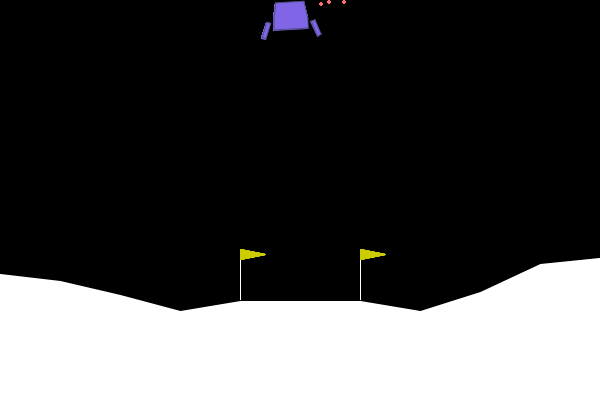

In [83]:
from PIL import Image
from IPython.display import display

env = gym.make("LunarLander-v2", render_mode="rgb_array")

# Reset the environment to get the initial state
observation = env.reset()

for i in range(30):
    env.step(0)

env.step(1)
env.step(1)
env.step(1)
env.step(1)
# env.step(3)
# env.step(2)
# env.step(1)
# env.step(3)
# env.step(2)
# env.step(1)
# env.step(3)
# env.step(2)


# Render the environment as RGB array
rgb_array = env.render()

# Convert the RGB array to a PIL Image
rgb_image = Image.fromarray(rgb_array)

# Save the RGB image as a .png file
rgb_image.save('gymnasium-1.png', 'PNG')

display(rgb_image)
# Close the environment
env.close()